In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load feature-engineered data
df = pd.read_csv("../data/CMG_features.csv", index_col=0, parse_dates=True)
df.head()

,cmg_close,spy_close,vix_close,log_return,rv_5d,rv_10d,rv_21d,rolling_mean_5,rolling_std_5,rolling_mean_10,...,rolling_std_change,vol_spike,spy_return,spy_vol,vix_return,vix_vol,target_rv_5d,target_rv_5d_log,vol_ratio_5_21,vol_ratio_10_21
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-02-04 05:00:00+00:00,470.90,191.60,16.81,0.019644,0.421460,0.368329,0.472316,466.784,9.306768,457.072,...,-1.344657,0,0.001567,0.240110,0.009610,0.646659,0.414927,0.347078,0.892324,0.779835
2016-02-05 05:00:00+00:00,460.14,187.95,17.48,-0.023115,0.476371,0.368745,0.441447,468.218,6.882915,458.010,...,-2.423853,0,-0.019234,0.187173,0.039857,0.543422,0.473791,0.387838,1.079109,0.835308
2016-02-08 05:00:00+00:00,445.00,185.42,18.32,-0.033457,0.375452,0.397520,0.448993,462.690,11.792218,458.293,...,4.909303,0,-0.013552,0.185353,0.048055,0.494011,0.294167,0.257867,0.836207,0.885358
2016-02-09 05:00:00+00:00,440.93,185.43,18.48,-0.009188,0.342046,0.393330,0.449812,455.742,12.448587,457.571,...,0.656369,0,0.000054,0.171140,0.008734,0.388020,0.164771,0.152525,0.760419,0.874431
2016-02-10 05:00:00+00:00,448.81,185.27,18.61,0.017714,0.378697,0.399263,0.451466,453.156,12.232221,458.188,...,-0.216366,0,-0.000863,0.148842,0.007035,0.312395,0.244623,0.218832,0.838814,0.884368


In [4]:
print(df.shape)
print(df.columns)
df.describe()

(2301, 31)
Index(['cmg_close', 'spy_close', 'vix_close', 'log_return', 'rv_5d', 'rv_10d',
       'rv_21d', 'rolling_mean_5', 'rolling_std_5', 'rolling_mean_10',
       'rolling_std_10', 'return_squared', 'abs_return', 'log_return_lag1',
       'rv_5d_lag1', 'vol_of_vol', 'abs_return_x_vol', 'abs_return_lag1',
       'abs_return_lag2', 'rv_10d_lag1', 'rv_21d_lag1', 'rolling_std_change',
       'vol_spike', 'spy_return', 'spy_vol', 'vix_return', 'vix_vol',
       'target_rv_5d', 'target_rv_5d_log', 'vol_ratio_5_21',
       'vol_ratio_10_21'],
      dtype='object')


,cmg_close,spy_close,vix_close,log_return,rv_5d,rv_10d,rv_21d,rolling_mean_5,rolling_std_5,rolling_mean_10,...,rolling_std_change,vol_spike,spy_return,spy_vol,vix_return,vix_vol,target_rv_5d,target_rv_5d_log,vol_ratio_5_21,vol_ratio_10_21
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,...,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000
mean,1023.230322,357.017118,20.950912,-0.000967,0.342965,0.384296,0.434542,1023.592787,19.426746,1024.032748,...,-0.004385,0.082138,0.000463,0.138352,0.005517,0.828841,0.342870,0.246525,0.916824,0.963501
std,741.828933,109.026148,9.544459,0.084399,1.290983,1.280995,1.265613,738.768781,67.770390,735.385038,...,42.586706,0.274635,0.011078,0.112509,0.163403,2.473776,1.290991,0.197288,0.410788,0.269744
min,47.790000,182.860000,5.250000,-3.908994,0.033536,0.087651,0.111976,48.782000,0.298915,49.188000,...,-1438.198919,0.000000,-0.114096,0.007505,-0.205151,0.045100,0.033536,0.032986,0.012562,0.022177
25%,419.540000,267.670000,13.500000,-0.009489,0.158197,0.189071,0.217599,420.568000,5.189655,421.223000,...,-2.036257,0.000000,-0.003645,0.069514,-0.025659,0.304376,0.158197,0.146865,0.621691,0.798048
50%,814.160000,335.870000,19.320000,0.001115,0.230576,0.258802,0.290380,816.060000,11.582947,816.060000,...,-0.007445,0.000000,0.000657,0.110814,-0.006861,0.460146,0.230468,0.207395,0.870387,0.986341
75%,1539.500000,436.040000,26.260000,0.011124,0.339492,0.363687,0.365379,1535.238000,23.046721,1531.077000,...,2.013177,0.000000,0.005898,0.172896,0.014306,0.732331,0.338404,0.291478,1.195142,1.173644
max,3427.610000,612.930000,60.200000,0.218657,27.706068,19.654447,13.552580,3308.892000,1739.169323,3253.269000,...,1316.753716,1.000000,0.083202,1.263777,4.059048,28.969720,27.706068,3.357109,2.090860,1.450236


In [5]:
pred = pd.read_csv("../data/vol_predictions.csv", index_col=0, parse_dates=True)
pred.head()

,actual_vol,predicted_vol
timestamp,,
2022-06-30 04:00:00+00:00,0.353897,0.292364
2022-07-01 04:00:00+00:00,0.467700,0.284062
2022-07-05 04:00:00+00:00,0.258619,0.278159
2022-07-06 04:00:00+00:00,0.320451,0.292364
2022-07-07 04:00:00+00:00,0.287593,0.307332


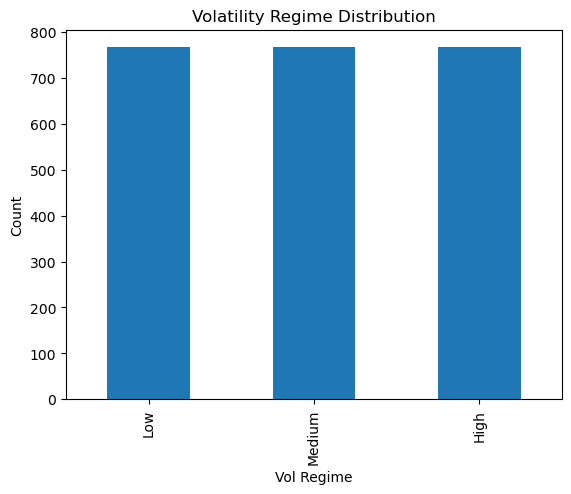

In [6]:
df['vol_regime'] = pd.qcut(df['target_rv_5d'], q=3, labels=['Low', 'Medium', 'High'])

df['vol_regime'].value_counts().plot(kind='bar', title="Volatility Regime Distribution")
plt.xlabel("Vol Regime")
plt.ylabel("Count")
plt.show()

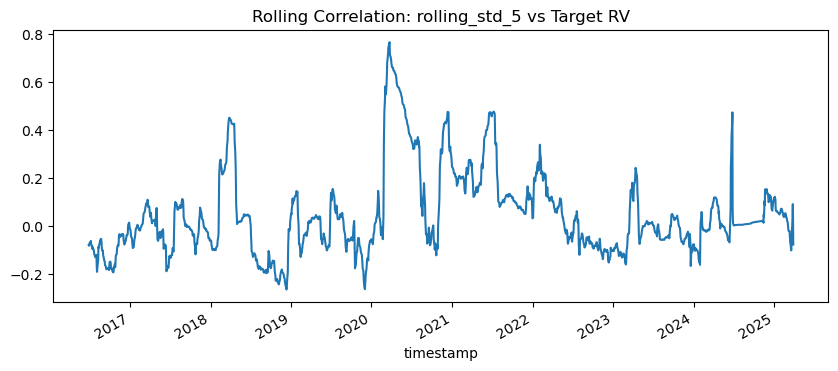

In [7]:
df['rolling_corr'] = df['rolling_std_5'].rolling(100).corr(df['target_rv_5d'])

df['rolling_corr'].plot(title="Rolling Correlation: rolling_std_5 vs Target RV", figsize=(10, 4))
plt.show()

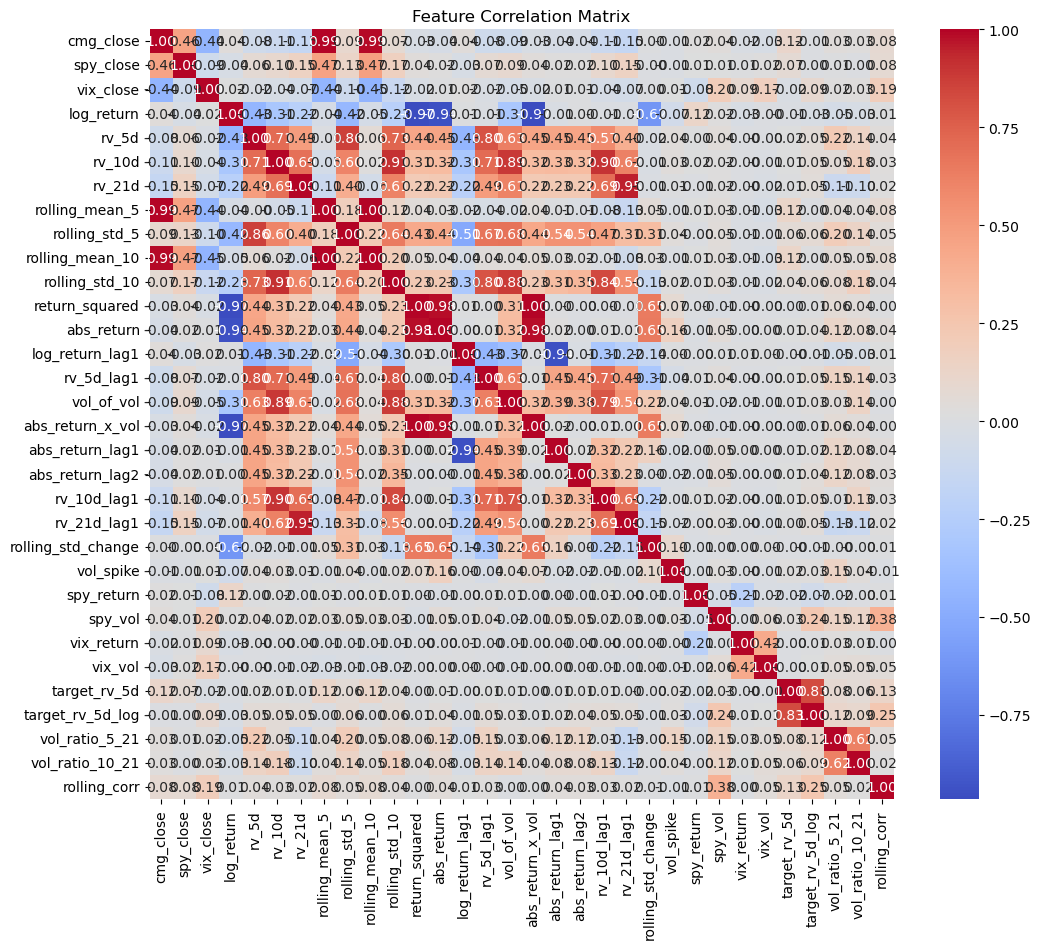

In [8]:
# Use only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

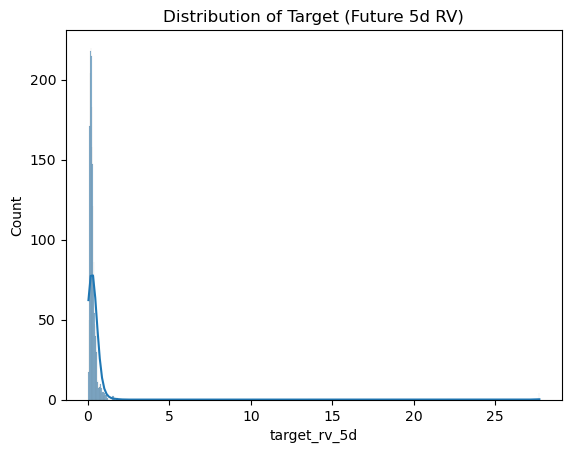

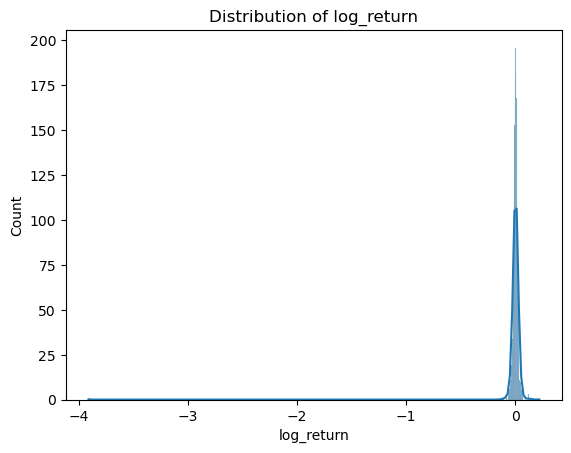

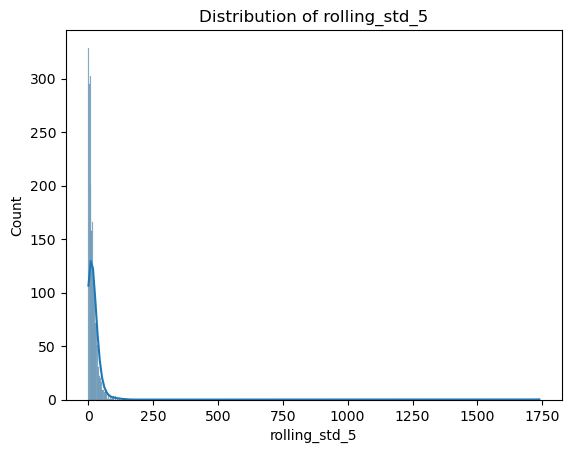

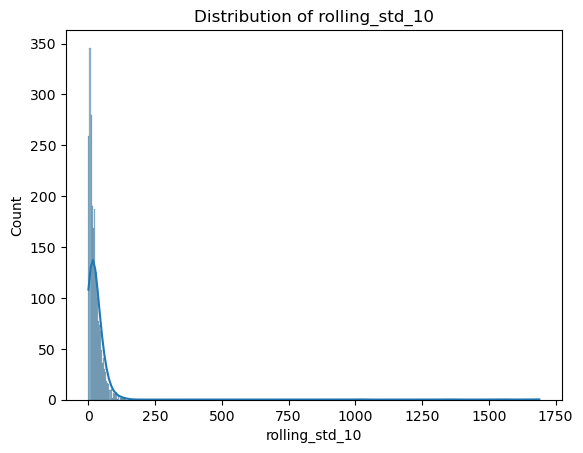

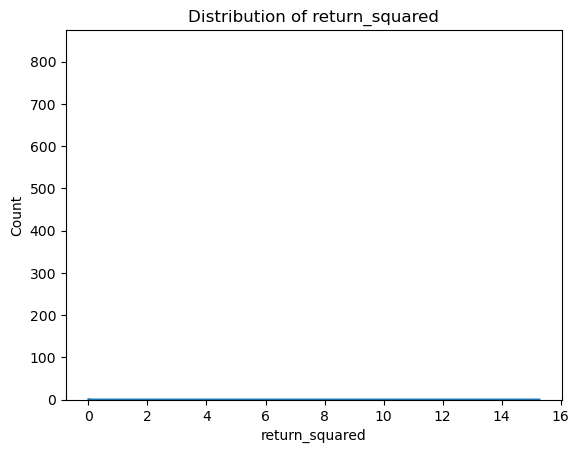

In [9]:
import seaborn as sns
sns.histplot(df['target_rv_5d'], kde=True).set_title("Distribution of Target (Future 5d RV)")
plt.show()

for col in ['log_return', 'rolling_std_5', 'rolling_std_10', 'return_squared']:
    sns.histplot(df[col], kde=True).set_title(f"Distribution of {col}")
    plt.show()

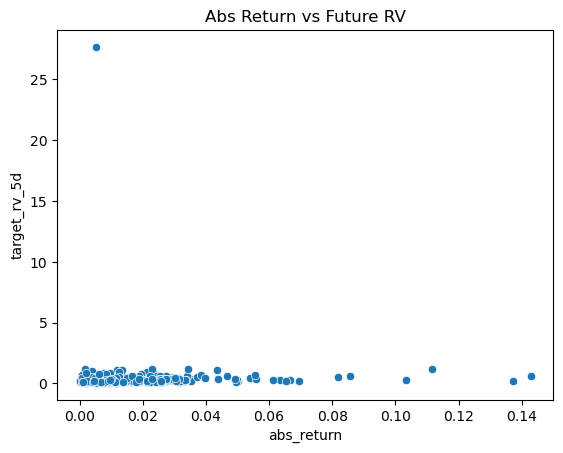

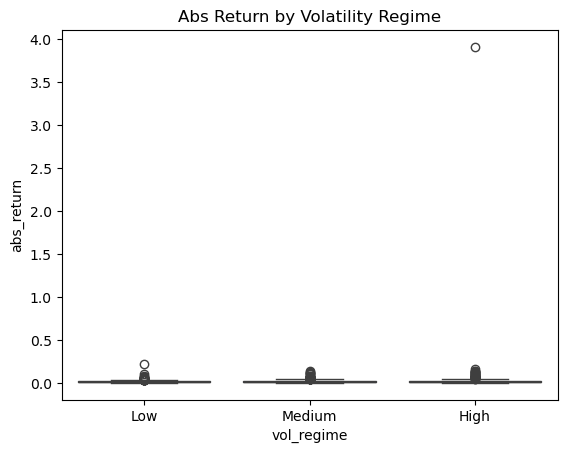

In [10]:
sns.scatterplot(x='abs_return', y='target_rv_5d', data=df.sample(500))
plt.title("Abs Return vs Future RV")
plt.show()

sns.boxplot(x='vol_regime', y='abs_return', data=df)
plt.title("Abs Return by Volatility Regime")
plt.show()

In [ ]:
decomp = seasonal_decompose(df['target_rv_5d'], model='additive', period=252)
decomp.plot()
plt.show()